In [1]:
!conda install matplotlib

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::seaborn==0.11.0=py_0
  - defaults/linux-64::anaconda==2020.11=py38_0
  - defaults/linux-64::bokeh==2.2.3=py38_0
  - defaults/noarch::imageio==2.9.0=py_0
  - defaults/linux-64::anaconda-navigator==1.10.0=py38_0
  - defaults/linux-64::matplotlib==3.3.2=0
  - defaults/linux-64::matplotlib-base==3.3.2=py38h817c723_0
  - defaults/noarch::flask==1.1.2=py_0
  - defaults/linux-64::scikit-image==0.17.2=py38hdf5156a_0
  - defaults/linux-64::gevent==20.9.0=py38h7b6447c_0
  - defaults/noarch::dask==2.30.0=py_0
failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
dfOvertime = pd.read_csv("OpenOvertime.csv")
dependent = json.load(open('../datasets/nq_open_test.json'))
dfOvertime['timely'] = dfOvertime['Question'].apply(lambda x: dependent[x])  

In [3]:
pd.set_option('display.max_colwidth', None)

In [71]:
dfOvertime['stdev'] = dfOvertime.filter(regex="Bleu Score").std(axis = 1)

In [72]:
#dfOvertime = dfOvertime.dropna()
dfOvertime[['stdev']]

,stdev
0,0.000000
6,0.000000
7,0.000000
9,0.000000
10,22.360680
...,...
1196,44.721360
1197,0.000000
1199,22.360680
1200,0.000000


In [73]:
pos = dfOvertime[dfOvertime["timely"]]
len(pos)/len(dfOvertime)

0.22664015904572565

<AxesSubplot:>

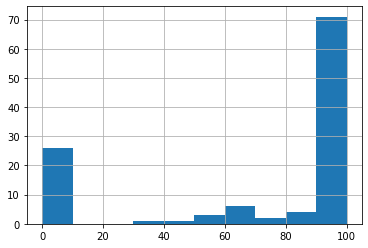

In [74]:
pos["max - min"].hist()

<AxesSubplot:>

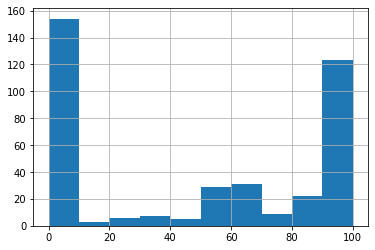

In [154]:
neg["max - min"].hist()

<AxesSubplot:>

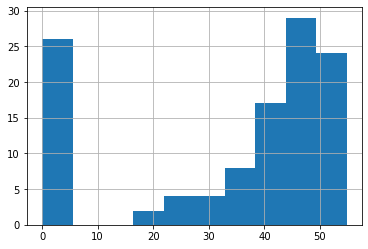

In [75]:
pos["stdev"].hist()

<AxesSubplot:>

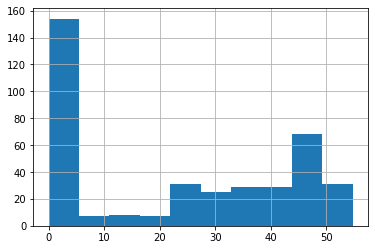

In [155]:
neg["stdev"].hist()

In [ ]:
truePos = len(pos[pos["stdev"] >= 70.0])
falseNeg = len(pos[pos["stdev"] < 70.0])
print(truePos, falseNeg)

In [51]:
truePos = len(pos[pos["max - min"] >= 70.0])
falseNeg = len(pos[pos["max - min"] < 70.0])
print(truePos, falseNeg)


77 37


In [76]:
neg = dfOvertime[dfOvertime["timely"] == False]
neg

,Unnamed: 0,Question,GT Answer,GT Topic,2008 Predicted,2008 Topic,2014 Bleu Score,2014 Predicted,2014 Topic,2016 Bleu Score,...,2018 Topic,2020 Bleu Score,2020 Predicted,2020 Topic,2021 Bleu Score,2021 Predicted,2021 Topic,max - min,timely,stdev
7,7,when was the south asian association for regional co-operation (saarc) formed,"['8 December 1985', 'December 1985']",South Asian Association for Regional Cooperation,"December 8, 1985, 1983, 2006","{'December 8, 1985': 'South Asian Association for Regional Cooperation', '1983': 'South Asian Association for Regional Cooperation', '2006': 'South Asian Association for Regional Cooperation'}",100.0,1985,South Asian Association for Regional Cooperation,100.000000,...,South Asian Association for Regional Cooperation,100.0,1985,South Asian Association for Regional Cooperation,100.0,1985,South Asian Association for Regional Cooperation,0.0,False,0.000000
9,9,is jaffa cakes a biscuit or a cake,"['cakes', 'the Jaffa cake should be considered a cake for tax purposes', 'biscuit - sized cakes', 'Cake']",Jaffa Cakes,"cakes, Cake or biscuit?\nUnder UK law, no VAT is charged on biscuits and cakes — they are ""zero rated"". Chocolate ""covered"" biscuits, however, are classed as luxury items and are subject to VAT at 17.5%. McVitie's classed its Jaffa Cakes as cakes, cake","{'cakes': 'Jaffa Cakes', 'Cake or biscuit?\nUnder UK law, no VAT is charged on biscuits and cakes — they are ""zero rated"". Chocolate ""covered"" biscuits, however, are classed as luxury items and are subject to VAT at 17.5%. McVitie\'s classed its Jaffa Cakes as cakes': 'Jaffa Cakes', 'cake': 'Jaffa Cakes'}",100.0,biscuits,Jaffa Cakes,100.000000,...,Jaffa Cakes,100.0,cake,Jaffa Cakes,100.0,cake,Jaffa Cakes,0.0,False,0.000000
10,10,how long was dark side of the moon number 1,"['42 : 49', 'a week']",The Dark Side of the Moon,"one week, 741 consecutive weeks (14 years, 14 years","{'one week': 'The Dark Side of the Moon', '741 consecutive weeks (14 years': 'The Dark Side of the Moon', '14 years': 'The Dark Side of the Moon'}",50.0,a week,The Dark Side of the Moon,100.000000,...,The Dark Side of the Moon,100.0,a week,The Dark Side of the Moon,100.0,a week,The Dark Side of the Moon,50.0,False,22.360680
18,18,when was united nations convention on the rights of the child created,['20 November 1989'],Convention on the Rights of the Child,"1989, 1948, 1989; it came into force on September 2 1990","{'1989': 'Convention on the Rights of the Child', '1948': 'Convention on the Rights of the Child', '1989; it came into force on September 2 1990': 'Convention on the Rights of the Child'}",0.0,1991,Convention on the Rights of the Child,100.000000,...,Convention on the Rights of the Child,100.0,1989,Convention on the Rights of the Child,100.0,16 December 1991,Convention on the Rights of the Child,100.0,False,47.140452
22,22,when did the song rapper's delight come out,"['September 16 , 1979', '1979']",Rapper's Delight,"1979, predates the advent of the sampler, 1980","{'1979': ""Rapper's Delight"", 'predates the advent of the sampler': ""Rapper's Delight"", '1980': ""Rapper's Delight""}",100.0,1979,Rapper's Delight,100.000000,...,Rapper's Delight,100.0,1979,Rapper's Delight,100.0,1979,Rapper's Delight,0.0,False,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,1196,who is known as the super fast boy in the series the icredible,"['Dashiell Robert Parr / Dash', ""Dashiell Robert Parr / Dash , the Parrs ' second child""]",The Incredibles,"Dash, Craig T. Nelson, Frozone","{'Dash': 'The Incredibles', 'Craig T. Nelson': 'The Incredibles', 'Frozone': 'The Incredibles'}",0.0,Mr. Incredible,The Incredibles,100.000000,...,The Incredibles,100.0,Mr. Incredible,The Incredibles,100.0,Mr. Incredible,The Incredibles,100.0,False,44.721360
1197,1197,who won the battle of the first battle of bull run,"['Confederate forces', 'Confederate victory', 'Confederate']",First Battle of Bull Run,"Jackson's 13, Beauregard, 

<AxesSubplot:>

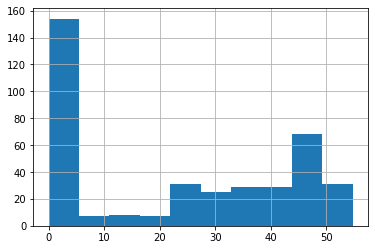

In [77]:
neg["stdev"].hist()

In [91]:
cutoff = 35.00

truePos = len(pos[pos["stdev"] >= cutoff])
falseNeg = len(pos[pos["stdev"] < cutoff])
print(truePos, falseNeg)

falsePos = len(neg[neg["stdev"] >= cutoff])
trueNeg = len(neg[neg["stdev"] < cutoff])
print(trueNeg, falsePos)

recall = truePos / (truePos + falseNeg)
print("Recall: ", recall) # how many times is it correct when the q is actually timely

precision = truePos / (truePos + falsePos)
print("Precision:", precision) # how many times is it correct when it detects timeliness

f1s = (2 * (precision * recall))/ (precision + recall)
print("F1 Score:", f1s)

77 37
242 147
Recall:  0.6754385964912281
Precision: 0.34375
F1 Score: 0.45562130177514787


In [86]:
cutoff = 70.00

truePos = len(pos[pos["max - min"] >= cutoff])
falseNeg = len(pos[pos["max - min"] < cutoff])
print(truePos, falseNeg)

falsePos = len(neg[neg["max - min"] >= cutoff])
trueNeg = len(neg[neg["max - min"] < cutoff])
print(trueNeg, falsePos)

recall = truePos / (truePos + falseNeg)
print("Recall: ", recall) # how many times is it correct when the q is actually timely

precision = truePos / (truePos + falsePos)
print("Precision", precision) # how many times is it correct when it detects timeliness

f1s = (2 * (precision * recall))/ (precision + recall)
print("F1 Score:", f1s)

77 37
235 154
Recall:  0.6754385964912281
Precision 0.3333333333333333
F1 Score: 0.44637681159420284


In [165]:
# true pos
pos[pos["max - min"] >= cutoff].filter(regex="Question|GT|Predicted|Bleu").sample(10)

,Question,GT Answer,GT Topic,2008 Predicted,2014 Bleu Score,2014 Predicted,2016 Bleu Score,2016 Predicted,2018 Bleu Score,2018 Predicted,2020 Bleu Score,2020 Predicted,2021 Bleu Score,2021 Predicted
289,when did the eagles play in the superbowl,"['February 6 , 2005']",Super Bowl XXXIX,"2004, Super Bowl XXXVI, Super Bowl XXXVI",22.222222,The Eagles were making their second Super Bowl appearance,100.000000,2004,0.000000,2017,100.000000,2017,100.0,2017
262,how much for a passport in the philippines,"['₱ 950', '₱ 950 ( 15 working days processing time ) or ₱ 1200 ( 7 working days processing time )', '950 pesos ( approximately $ 18 ) in the Philippines']",Philippine passport,"500 pesos, 100 pesos, a travel document issued to citizens of the Philippines. It is issued by the Department of Foreign Affairs and Philippine diplomatic missions abroad, with certain exceptions. Besides facilitating international travel and conferring diplomatic assistance to Filipinos overseas, a Philippine passport is considered a primary form of identification",75.000000,only issued to citizens,100.000000,100 pesos,62.500000,Philippine passports are only issued to Filipino citizens,100.000000,100 pesos,100.0,100 pesos
123,how many students does monarch high school have,"['2,406 ( 2014 - 15 )', '2,406']",Monarch High School (Florida),"more than half a million, more than half a million pinwheels throughout the world though some USA schools found them 'too political'.\nPhysical facilities.\nThe pair of buildings that make up the school were designed by the Miami architectural firm Zyscovitch on a design/build basis. Part of one building can be used as a hurricane shelter if necessary and the project is designed to enable community use of the facilities when not being used by the school.\nDigital Learning Environment.\nThe school provides each student",65.714286,"Monarch has an FCAT school grade of ""A"" for the 2010–2011 academic year.\nCampus.\nThe pair of buildings that make up the school were designed by the Miami architectural firm Zyscovitch on a design/build basis. Building four",19.430370,"AP® and Advanced Placement® are registered trademarks of the College Board. Used with permission.\nInternational Baccalaureate (IB) data provided by International Baccalaureate of North America. Used with permission.\nStudent Body.\nClass.\nThese details on the school's student body are based on data reported to the government.\nStudent Diversity.\nThis is the breakdown of ethnicity and gender of a school's student body, based on data reported to the government.\nEconomically Disadvantaged Students",0.000000,Student Diversity,66.666667,Economically Disadvantaged Students,100.0,Student Diversity
540,who won the mvp for the national league,"['Giancarlo Stanton', 'Stanton , Giancarlo']",Major League Baseball Most Valuable Player Award,"Hack Wilson, Dennis Eckersley, Nap Lajoie",0.000000,Frank Robinson,100.000000,Frank Robinson,100.000000,Frank Robinson,100.000000,Frank Robinson,100.0,Frank Robinson
44,who has appeared in the most royal rumbles,"[""Isaac Yankem / `` Diesel '' / Kane""]",Royal Rumble,"15, Stone Cold Steve Austin, The Rumble winner",33.333333,The Big Show,100.000000,The Big Show,0.000000,Kofi Kingston,14.285714,most Rumble matches last roughly one hour,100.0,most Rumble matches last roughly one hour
451,how long has tom brady been playing professional football,['18 - season career'],Tom Brady,"four seasons, 2000 and 2001 seasons, 1977",50.000000,fourteen seasons,0.000000,15th,100.000000,15th,100.000000,15th,50.0,18 seasons
654,when did the philadelphia eagles play in the super bowl last,['Super Bowl LII'],Super Bowl XXXIX,"Super Bowl XXXVI, Super Bowl XXXVI, 15-4",0.000000,1981,100.000000,1981,100.000000,1981,100.000000,1981,100.0,1981
1053,when is the last time the us lost the olympics,['2018 Pyeongchang'],United States at the Olympics,1980,100.000000,1980,100.000000,1980,100.000000,1980,0.000000,1996,100.0,1996
37,where can the mona lisa be found today,"

In [161]:
# false negatives "Timeless!"
pos[pos["max - min"] < cutoff].filter(regex="Question|GT|Predicted|Bleu").sample(10)

,Question,GT Answer,GT Topic,2008 Predicted,2014 Bleu Score,2014 Predicted,2016 Bleu Score,2016 Predicted,2018 Bleu Score,2018 Predicted,2020 Bleu Score,2020 Predicted,2021 Bleu Score,2021 Predicted
479,what is the most current adobe flash player version,['28.0. 0.137'],Adobe Flash Player,"Version 9, Version 7, gnash",100.0,Version 9,100.0,Version 9,100.0,Version 9,100.0,Version 9,100.0,Version 9
78,who did the broncos beat in the super bowl,['Green Bay Packers'],Denver Broncos,"New England Patriots, Dallas Cowboys, Atlanta Falcons",100.0,New England Patriots,100.0,New England Patriots,100.0,New England Patriots,100.0,New England Patriots,100.0,New England Patriots
0,what are the main crops grown in the united states,['Corn'],Agriculture in the United States,"Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds, Soybeans, tobacco, barley, and oats",100.0,"Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds",100.0,"Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds",100.0,"Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds",100.0,"Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds",100.0,"Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds"
577,who drove the number 18 car in nascar,['Kyle Busch'],Joe Gibbs Racing,"Brad Coleman, J. J. Yeley, Kyle Busch",100.0,Kyle Busch,100.0,Brad Coleman,100.0,Brad Coleman,100.0,Brad Coleman,100.0,Brad Coleman
6,who did the 49ers beat in the super bowls,['Cincinnati Bengals'],San Francisco 49ers,"Dallas Cowboys, Washington Redskins, Miami Dolphins",100.0,Dallas Cowboys,100.0,Miami Dolphins,100.0,Dallas Cowboys,100.0,Dallas Cowboys,100.0,Washington Redskins
375,when was the last time university of michigan won a national championship,['1997'],Michigan Wolverines football,"1948 and 1997, 1935",100.0,1997,100.0,1997,100.0,1997,100.0,1997,100.0,1997
576,who was elected the president of constituent assembly,"['Dr. Rajendra Prasad , INC', 'Dr. Rajendra Prasad', 'Rajendra Prasad']",Constituent Assembly of India,"Dr. Rajendra Prasad, Vallabhbhai Patel",100.0,Dr. Rajendra Prasad,100.0,Dr. Rajendra Prasad,100.0,Dr. Rajendra Prasad,100.0,Dr. Rajendra Prasad,100.0,Dr. Rajendra Prasad
476,who is the owner of reading football club,"['Dai Yongge and Dai Xiuli ( majority )', 'Xiu Li Dai', 'Dai Yongge']",Reading F.C.,"John Madejski, Steve Coppell, Alan Pardew",100.0,John Madejski,100.0,John Madejski,100.0,John Madejski,100.0,John Madejski,100.0,John Madejski
193,when was the last time the eu was audited,['1994'],European Court of Auditors,"1994, 1977-10-18, 1984 and 1999",100.0,1994,100.0,1994,100.0,1994,100.0,1994,100.0,1994
927,what was the biggest tank in world war 2,"['Panzerkampfwagen VIII Maus', ""Panzerkampfwagen VIII Maus ( `` Mouse '' )""]",Panzer VIII Maus,"The Panzerkampfwagen VIII Maus, the Maus, V2",100.0,Panzerkampfwagen VIII Maus,100.0,Panzerkampfwagen VIII Maus,100.0,Panzerkampfwagen VIII Maus,100.0,Panzerkampfwagen VIII Maus,100.0,The Maus


In [164]:
# false positives "Timely!"
neg[neg["max - min"] >= cutoff].filter(regex="Question|GT|Predicted|Bleu").sample(10)

,Question,GT Answer,GT Topic,2008 Predicted,2014 Bleu Score,2014 Predicted,2016 Bleu Score,2016 Predicted,2018 Bleu Score,2018 Predicted,2020 Bleu Score,2020 Predicted,2021 Bleu Score,2021 Predicted
533,when did how you remind me come out,"['August 21 , 2001']",How You Remind Me,"2001, 2002, 3 months",100.000000,2001,33.333333,"August 21, 2001",100.0,"August 21, 2001",100.000000,"August 21, 2001",33.333333,"July 17, 2001"
549,where did students for a democratic society start,"['the University of Michigan campus at Ann Arbor , Michigan', 'Ann Arbor , Michigan', 'University of Michigan campus at Ann Arbor , Michigan']",Students for a Democratic Society,"the United States, Intercollegiate Socialist Society, United States",100.000000,the United States,100.000000,the United States,100.0,the United States,0.000000,1960,100.000000,1960
542,who produced a change is gonna come,['Hugo & Luigi'],A Change Is Gonna Come,A Change,0.000000,Hugo &amp; Luigi,100.000000,Hugo &amp; Luigi,100.0,Hugo &amp; Luigi,100.000000,Hugo &amp; Luigi,100.000000,Hugo &amp; Luigi
645,when did the romanticism period start and end,"['in the approximate period from 1800 to 1850', 'originated in Europe toward the end of the 18th century , and in most areas was at its peak in the approximate period from 1800 to 1850', '1780 -- 1830']",Romanticism,"1815 to 1848, 1820s, mid 19th century",20.000000,middle of the 18th century,100.000000,18th century,100.0,18th century,100.000000,middle of the 19th century,100.000000,middle of the 19th century
658,when did movies start coming out in color,"['1895', 'introduced around 1940']",Color motion picture film,"1895, 15 May 1917, Between 1900 and 1935",16.666667,late 19th and early 20th century,100.000000,late 19th and early 20th century,100.0,late 19th and early 20th century,100.000000,late 19th and early 20th century,100.000000,late 19th and early 20th century
253,who took the first steps on the moon in 1969,['Neil Armstrong'],Apollo 11,"Armstrong and Aldrin, Commander Neil Alden Armstrong, Command Module Pilot Michael Collins and Lunar Module Pilot Edwin Eugene 'Buzz' Aldrin, Jr. On July 20, Armstrong and Aldrin, Here Men From The Planet Earth",100.000000,Armstrong and Aldrin,100.000000,Armstrong and Aldrin,100.0,Armstrong and Aldrin,65.498460,Neil Armstrong and Buzz Aldrin,100.000000,Armstrong and Buzz Aldrin
785,what does ss stand for on naval ships,"['Single - screw Steamship', ""`` United States Ship '' ( USS )""]",Ship prefix,"steamship, United States Frigate, Revenue Cutter Service became the United States Coast Guard in 1915.\nA United States ship that has not yet been commissioned in the Navy does not hold the title of USS, it holds the title of PCU (Pre-commissioned unit).",100.000000,United States Frigate,66.666667,United States Ship,100.0,United States Ship,16.666667,Seagoing ships Fish and Wildlife Service,100.000000,United States Ship
481,who was named african footballer of the year 2014,['Yaya Touré'],African Footballer of the Year,"Didier Drogba, Abedi Pelé and George Weah",100.000000,George Weah,100.000000,George Weah,0.0,Frédéric Kanouté,100.000000,George Weah,100.000000,George Weah
503,which film won the oscar for best animated feature in 2007,['Ratatouille'],Academy Award for Best Animated Feature,"Shrek, Beauty and the Beast""",5.000000,"Toy Story 3"" (2010) also received Best Picture nominations after the Academy expanded the number of nominees. ""Waltz with Bashir",47.768754,Waltz with Bashir,100.0,Shrek,100.000000,Shrek,66.666667,Toy Story 3
709,what was the purpose of a revival meeting during the second great awakening,['evangelizing'],Second Great Awakening,"renewed personal salvation, the camp meeting, a major mode of church expansion",15.384615,remedy the evils of society before the anticipated Second Coming of Jesus Christ,100.000000,remedy the evils of society before the anticipated Second Coming of Jesus Christ,100.0,remedy the evils of society before the anticipated Second Coming of Jesus Christ,

In [166]:
neg[neg["max - min"] < cutoff].filter(regex="Question|GT|Predicted|Bleu").sample(10)

,Question,GT Answer,GT Topic,2008 Predicted,2014 Bleu Score,2014 Predicted,2016 Bleu Score,2016 Predicted,2018 Bleu Score,2018 Predicted,2020 Bleu Score,2020 Predicted,2021 Bleu Score,2021 Predicted
120,when did frank sinatra first sing new york new york,"['1980', '1979']","Theme from New York, New York","1979, October 1978, 1978",100.0,1979,100.0,1979,100.0,October 1978,100.0,1979,100.0,1979
808,when was the mission san antonio de valero built,"['the 18th century', '1718']",Alamo Mission in San Antonio,"18th century, 1718, May 8, 1744",100.0,18th century,100.0,18th century,100.0,18th century,100.0,18th century,100.0,18th century
1119,where does the lincoln highway begin and end,"['Times Square in New York City', 'from Times Square in New York City west to Lincoln Park in San Francisco']",Lincoln Highway,"Portland, Gettysburg, Pennsylvania, Times Square in New York City to Lincoln Park in San Francisco",100.0,Portland,100.0,Portland,100.0,Portland,100.0,Portland,100.0,Portland
713,who was the first black person to register to vote,['Thomas Mundy Peterson'],Thomas Mundy Peterson,Thomas Mundy Peterson,100.0,Thomas Mundy Peterson,100.0,Thomas Mundy Peterson,100.0,Thomas Mundy Peterson,100.0,Thomas Mundy Peterson,100.0,Thomas Mundy Peterson
914,who wrote the text for jeanie with the light brown hair,['Stephen Foster'],Jeanie with the Light Brown Hair,Stephen Foster,100.0,Stephen Foster,100.0,Stephen Foster,100.0,Stephen Foster,100.0,Stephen Foster,100.0,Stephen Foster
684,when did canada get rid of the death penalty,"['July 14 , 1976', '1998']",Capital punishment in Canada,"July 14, 1976, 1963, July 14, 1976",100.0,"July 14, 1976",100.0,"July 14, 1976",100.0,1963,100.0,1963,100.0,1963
942,who plays the grandmother in game of thrones,['Rigg'],Diana Rigg,"Dame Enid Diana Elizabeth Rigg, Morecambe and Wise, Lazenby",100.0,Rigg,100.0,Rigg,100.0,Rigg,100.0,Rigg,100.0,Rigg
705,who played susanna in legends of the fall,['Julia Ormond'],Legends of the Fall,"Aidan Quinn, brothers, Tristan",100.0,Aidan Quinn,100.0,Aidan Quinn,100.0,Aidan Quinn,100.0,Aidan Quinn,100.0,Aidan Quinn
202,when did las vegas become a gambling town,"['1931', 'In 1931']",History of Las Vegas,"1931, 1954, May 15, 1905",100.0,1931,100.0,1931,100.0,1931,100.0,1931,100.0,"May 15, 1905"
810,when did lord howe island became a world heritage site,"['in 1982', '1982']",Lord Howe Island,"1982, 17 February 1788, Lord Howe Swamphen or White Gallinule (""Porphyrio albus""), the White-throated Pigeon (""Columba vitiensis godmanae""), Red-fronted Parakeet (""Cyanoramphus novaezelandiae subflavescens"") and the Tasman Booby (""Sula tasmani"")\nwere eliminated by settlers during the nineteenth century",100.0,1982,100.0,1982,100.0,1982,100.0,1982,100.0,1982


<AxesSubplot:>

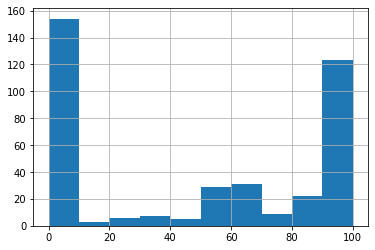

In [48]:
neg["max - min"].hist()

In [5]:
dfOvertime = dfOvertime.mask(dfOvertime.eq('None')).dropna()

In [156]:
dfOvertime.filter(regex="Predicted")

,2008 Predicted,2014 Predicted,2016 Predicted,2018 Predicted,2020 Predicted,2021 Predicted
0,"Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds, Soybeans, tobacco, barley, and oats","Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds","Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds","Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds","Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds","Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds"
6,"Dallas Cowboys, Washington Redskins, Miami Dolphins",Dallas Cowboys,Miami Dolphins,Dallas Cowboys,Dallas Cowboys,Washington Redskins
7,"December 8, 1985, 1983, 2006",1985,1985,1985,1985,1985
9,"cakes, Cake or biscuit?\nUnder UK law, no VAT is charged on biscuits and cakes — they are ""zero rated"". Chocolate ""covered"" biscuits, however, are classed as luxury items and are subject to VAT at 17.5%. McVitie's classed its Jaffa Cakes as cakes, cake",biscuits,cake,cake,cake,cake
10,"one week, 741 consecutive weeks (14 years, 14 years",a week,one week,a week,a week,a week
...,...,...,...,...,...,...
1196,"Dash, Craig T. Nelson, Frozone",Mr. Incredible,Mr. Incredible,Mr. Incredible,Mr. Incredible,Mr. Incredible
1197,"Jackson's 13, Beauregard, Brig. Gen. Irvin McDowell",Beauregard,Beauregard,Brig. Gen. Irvin McDowell,McDowell,McDowell
1199,"one companion cell, companion cell, Sieve cells",companion cells,companion cells,companion cells,parenchyma cells,parenchyma cells
1200,"the central government, central government, Congress",Congress,Congress,the central government,central government,Congress


In [6]:
dfOvertime.sort_values("max - min").tail(100).sample(10)

,Unnamed: 0,Question,GT Answer,GT Topic,2008 Predicted,2008 Topic,2014 Bleu Score,2014 Predicted,2014 Topic,2016 Bleu Score,...,2018 Predicted,2018 Topic,2020 Bleu Score,2020 Predicted,2020 Topic,2021 Bleu Score,2021 Predicted,2021 Topic,max - min,timely
745,745,when was the design period known as art deco,['1910 -- 1939'],Art Deco,"1920 until 1939, 1930s, 1940s","{'1920 until 1939': 'Art Deco', '1930s': 'Art Deco', '1940s': 'Art Deco'}",0.000000e+00,1925,Art Deco,100.000000,...,1925,Art Deco,0.000000,1910–19,Art Deco,100.000000,1925,Art Deco,100.0,False
826,826,what class of ship is the carnival glory,"['a Conquest - class cruise ship', 'Conquest - class cruise ship', 'Conquest']",Carnival Glory,Conquest Class,{'Conquest Class': 'Carnival Glory'},0.000000e+00,"Conquest""-class",Carnival Glory,0.000000,...,Old Glory Atrium,Carnival Glory,100.000000,"Conquest""-class",Carnival Glory,100.000000,"Conquest""-class",Carnival Glory,100.0,False
139,139,how many seasons has greys anatomy been on tv,['14'],Grey's Anatomy,"fourth, Season 3, 2","{'fourth': ""Grey's Anatomy"", 'Season 3': ""Grey's Anatomy"", '2': ""Grey's Anatomy""}",0.000000e+00,ten,Grey's Anatomy,0.000000,...,nine,Grey's Anatomy,100.000000,nine,Grey's Anatomy,100.000000,nine,Grey's Anatomy,100.0,True
47,47,who plays yoda in revenge of the sith,['Frank Oz'],Yoda,"Palpatine, Count Dooku, Vandar Tokare","{'Palpatine': 'Yoda', 'Count Dooku': 'Yoda', 'Vandar Tokare': 'Yoda'}",0.000000e+00,Tom Kane,Yoda,100.000000,...,Frank Oz,Yoda,100.000000,Frank Oz,Yoda,100.000000,Frank Oz,Yoda,100.0,False
483,483,how many countries are a part of opec,['14'],OPEC,"Algeria, Angola, Indonesia, Iran, Iraq, Kuwait, Libya, Nigeria, Qatar, Saudi Arabia, the United Arab Emirates, Venezuela, and Ecuador, Iran, Iraq, Kuwait, Saudi Arabia, and Venezuela, thirteen","{'Algeria, Angola, Indonesia, Iran, Iraq, Kuwait, Libya, Nigeria, Qatar, Saudi Arabia, the United Arab Emirates, Venezuela, and Ecuador': 'OPEC', 'Iran, Iraq, Kuwait, Saudi Arabia, and Venezuela': 'OPEC', 'thirteen': 'OPEC'}",5.458205e+01,"nine more governments: Libya, United Arab Emirates, Qatar, Indonesia, Algeria, Nigeria, Ecuador, Angola, and Gabon",OPEC,76.190476,...,the Arab majority of OPEC plus Egypt and Syria,OPEC,0.000000,13,OPEC,100.000000,13,OPEC,100.0,True
75,75,who does bryce dallas howard play in the grinch,['Surprised Who'],Bryce Dallas Howard,"Alfred Molina, Henry Winkler, Lindsay Lohan","{'Alfred Molina': 'Bryce Dallas Howard', 'Henry Winkler': 'Bryce Dallas Howard', 'Lindsay Lohan': 'Bryce Dallas Howard'}",0.000000e+00,Joaquin Phoenix,Bryce Dallas Howard,0.000000,...,Victoria,Bryce Dallas Howard,100.000000,Victoria,Bryce Dallas Howard,0.000000,Hilly Holbrook,Bryce Dallas Howard,100.0,False
461,461,what are some special products made in mississippi,['farm - raised catfish'],Mississippi,"gospel music, country music, jazz, blues, and rock and roll, gospel music, country music, public schools, roads and railroads","{'gospel music, country music, jazz, blues, and rock and roll': 'Mississippi', 'gospel music, country music': 'Mississippi', 'public schools, roads and railroads': 'Mississippi'}",9.000000e+01,"gospel music, country music, jazz, blues and rock and roll",Mississippi,100.000000,...,grocers,Mississippi,100.000000,"gospel music, country music, jazz, blues and rock and roll",Mississippi,100.000000,"gospel music, country music, jazz, blues and rock and roll",Mississippi,100.0,True
123,123,how many students does monarch high school have,"['2,406 ( 2014 - 15 )', '2,406']",Monarch High School (Florida),"more than half a million, more than half a million pinwheels throughout the world though some USA schools found them 'too political'.\nPhysical facilities.\nThe pair of buildings that make up the school were designed by the Miami architectural firm Zyscovitch on a design/build basis. Part of one building can be used as a hurricane shelter if necessary and the project is designed to enable community use of the facilities wh

In [7]:
dfGT = pd.read_csv("OpenGT.csv")
dfGT['timely'] = dfGT['Question'].apply(lambda x: dependent[x])  
dfGT = dfGT.dropna()
dfGT = dfGT.mask(dfGT.eq('None')).dropna()

In [94]:
dfGT['stdev'] = dfGT.filter(regex="Bleu Score").std(axis = 1)

In [97]:
posGT = dfGT[dfGT["timely"]]
negGT = dfGT[dfGT["timely"] == False]

<AxesSubplot:>

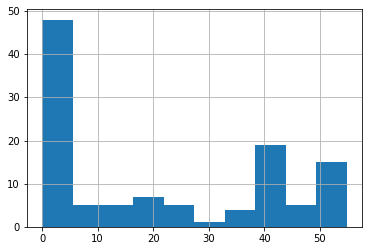

In [100]:
posGT["stdev"].hist()

<AxesSubplot:>

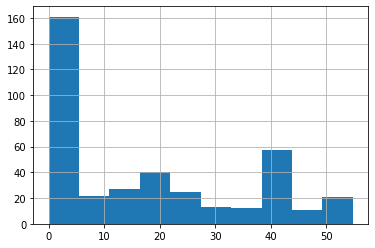

In [101]:
negGT["stdev"].hist()

<AxesSubplot:>

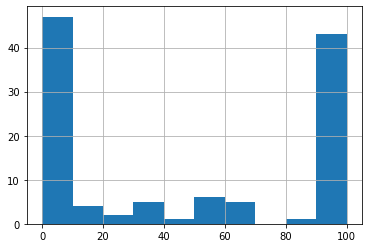

In [102]:
posGT["max - min"].hist()

<AxesSubplot:>

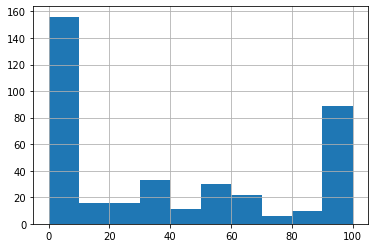

In [103]:
negGT["max - min"].hist()

In [104]:
cutoff = 30.00

truePos = len(posGT[posGT["stdev"] >= cutoff])
falseNeg = len(posGT[posGT["stdev"] < cutoff])
print(truePos, falseNeg)

falsePos = len(negGT[negGT["stdev"] >= cutoff])
trueNeg = len(negGT[negGT["stdev"] < cutoff])
print(trueNeg, falsePos)

recall = truePos / (truePos + falseNeg)
print("Recall: ", recall) # how many times is it correct when the q is actually timely

precision = truePos / (truePos + falsePos)
print("Precision:", precision) # how many times is it correct when it detects timeliness

f1s = (2 * (precision * recall))/ (precision + recall)
print("F1 Score:", f1s)

44 70
280 109
Recall:  0.38596491228070173
Precision: 0.2875816993464052
F1 Score: 0.3295880149812734


In [105]:
cutoff = 40.00

truePos = len(posGT[posGT["max - min"] >= cutoff])
falseNeg = len(posGT[posGT["max - min"] < cutoff])
print(truePos, falseNeg)

falsePos = len(negGT[negGT["max - min"] >= cutoff])
trueNeg = len(negGT[negGT["max - min"] < cutoff])
print(trueNeg, falsePos)

recall = truePos / (truePos + falseNeg)
print("Recall: ", recall) # how many times is it correct when the q is actually timely

precision = truePos / (truePos + falsePos)
print("Precision:", precision) # how many times is it correct when it detects timeliness

f1s = (2 * (precision * recall))/ (precision + recall)
print("F1 Score:", f1s)

56 58
221 168
Recall:  0.49122807017543857
Precision: 0.25
F1 Score: 0.3313609467455621


In [118]:
# dfOvertime merge dfGT.filter(regex="Question|2018 Bleu Score")
dfOTGT = dfOvertime.merge(dfGT.filter(regex="Question|2018 Bleu Score"), how="outer", on="Question")
dfOTGT.rename(columns = {"2018 Bleu Score_y": "Accuracy"}, inplace = True)
dfOTGT

,Unnamed: 0,Question,GT Answer,GT Topic,2008 Predicted,2008 Topic,2014 Bleu Score,2014 Predicted,2014 Topic,2016 Bleu Score,...,2020 Bleu Score,2020 Predicted,2020 Topic,2021 Bleu Score,2021 Predicted,2021 Topic,max - min,timely,stdev,Accuracy
0,0,what are the main crops grown in the united states,['Corn'],Agriculture in the United States,"Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds, Soybeans, tobacco, barley, and oats","{'Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds': 'Agriculture in the United States', 'Soybeans': 'Agriculture in the United States', 'tobacco, barley, and oats': 'Agriculture in the United States'}",100.0,"Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds",Agriculture in the United States,100.000000,...,100.0,"Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds",Agriculture in the United States,100.0,"Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds",Agriculture in the United States,0.0,True,0.000000,0.0
1,6,who did the 49ers beat in the super bowls,['Cincinnati Bengals'],San Francisco 49ers,"Dallas Cowboys, Washington Redskins, Miami Dolphins","{'Dallas Cowboys': 'San Francisco 49ers', 'Washington Redskins': 'San Francisco 49ers', 'Miami Dolphins': 'San Francisco 49ers'}",100.0,Dallas Cowboys,San Francisco 49ers,100.000000,...,100.0,Dallas Cowboys,San Francisco 49ers,100.0,Washington Redskins,San Francisco 49ers,0.0,True,0.000000,0.0
2,7,when was the south asian association for regional co-operation (saarc) formed,"['8 December 1985', 'December 1985']",South Asian Association for Regional Cooperation,"December 8, 1985, 1983, 2006","{'December 8, 1985': 'South Asian Association for Regional Cooperation', '1983': 'South Asian Association for Regional Cooperation', '2006': 'South Asian Association for Regional Cooperation'}",100.0,1985,South Asian Association for Regional Cooperation,100.000000,...,100.0,1985,South Asian Association for Regional Cooperation,100.0,1985,South Asian Association for Regional Cooperation,0.0,False,0.000000,100.0
3,9,is jaffa cakes a biscuit or a cake,"['cakes', 'the Jaffa cake should be considered a cake for tax purposes', 'biscuit - sized cakes', 'Cake']",Jaffa Cakes,"cakes, Cake or biscuit?\nUnder UK law, no VAT is charged on biscuits and cakes — they are ""zero rated"". Chocolate ""covered"" biscuits, however, are classed as luxury items and are subject to VAT at 17.5%. McVitie's classed its Jaffa Cakes as cakes, cake","{'cakes': 'Jaffa Cakes', 'Cake or biscuit?\nUnder UK law, no VAT is charged on biscuits and cakes — they are ""zero rated"". Chocolate ""covered"" biscuits, however, are classed as luxury items and are subject to VAT at 17.5%. McVitie\'s classed its Jaffa Cakes as cakes': 'Jaffa Cakes', 'cake': 'Jaffa Cakes'}",100.0,biscuits,Jaffa Cakes,100.000000,...,100.0,cake,Jaffa Cakes,100.0,cake,Jaffa Cakes,0.0,False,0.000000,100.0
4,10,how long was dark side of the moon number 1,"['42 : 49', 'a week']",The Dark Side of the Moon,"one week, 741 consecutive weeks (14 years, 14 years","{'one week': 'The Dark Side of the Moon', '741 consecutive weeks (14 years': 'The Dark Side of the Moon', '14 years': 'The Dark Side of the Moon'}",50.0,a week,The Dark Side of the Moon,100.000000,...,100.0,a week,The Dark Side of the Moon,100.0,a week,The Dark Side of the Moon,50.0,False,22.360680,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,1196,who is known as the super fast boy in the series the icredible,"['Dashiell Robert Parr / Dash', ""Dashiell Robert Parr / Dash , the Parrs ' second child""]",The Incredibles,"Dash, Craig T. Nelson, Frozone","{'Dash': 'The Incredibles', 'Craig T. Nelson': 'The Incredibles', 'Frozone': 'The Incredibles'}",0.0,Mr. Incredible,The Incredibles,100.000000,...,100.0,Mr. Incredible,The Incredibles,100.0,Mr. Incredible,The Incredibles,100.0,False,44.721360,0.0
499,1197,who won the battle of the first battle of bull run,"['Confederate 

<AxesSubplot:>

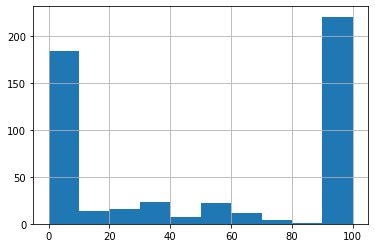

In [119]:
dfOTGT["Accuracy"].hist()

In [110]:
dfGT[dfGT["2018 Bleu Score"] >= 70.00].filter(regex="Question|GT|2018")

,Question,GT Answer,GT Topic,2018 Bleu Score,2018 Predicted,2018 Topic
7,when was the south asian association for regional co-operation (saarc) formed,"['8 December 1985', 'December 1985']",South Asian Association for Regional Cooperation,100.0,8 December 1985,South Asian Association for Regional Cooperation
9,is jaffa cakes a biscuit or a cake,"['cakes', 'the Jaffa cake should be considered a cake for tax purposes', 'biscuit - sized cakes', 'Cake']",Jaffa Cakes,100.0,cake,Jaffa Cakes
10,how long was dark side of the moon number 1,"['42 : 49', 'a week']",The Dark Side of the Moon,100.0,a week,The Dark Side of the Moon
14,who does dwyane wade play for right now,"['the Miami Heat', 'the Miami Heat of the National Basketball Association ( NBA )', 'Miami Heat']",Dwyane Wade,100.0,Miami Heat,Dwyane Wade
22,when did the song rapper's delight come out,"['September 16 , 1979', '1979']",Rapper's Delight,100.0,September 1979,Rapper's Delight
...,...,...,...,...,...,...
1193,where does aarp fall on the political spectrum,['non-partisan'],AARP,100.0,non-partisan,AARP
1194,who started ww2 and how did it start,"['Nazi Germany', 'begun on 1 September 1939 with the invasion of Poland by Nazi Germany', 'on 1 September 1939 with the invasion of Poland by Nazi Germany and subsequent declarations of war on Germany by France and the United Kingdom']",World War II,75.0,German invasion of Poland,World War II
1195,what is the setting of the book hoot,"['Florida and into the town of Coconut Cove', 'Florida']",Hoot (novel),100.0,Florida,Hoot (novel)
1197,who won the battle of the first battle of bull run,"['Confederate forces', 'Confederate victory', 'Confederate']",First Battle of Bull Run,100.0,Confederate,First Battle of Bull Run


In [138]:
posfOT = dfOTGT.loc[(dfOTGT["Accuracy"] >= 60.00) & (dfOTGT["timely"])]
negfOT = dfOTGT.loc[(dfOTGT["Accuracy"] >= 60.00) & (dfOTGT["timely"] == False)]
#print(len(filtOT)/len(dfOTGT))

In [139]:
posfGT = dfGT.loc[(dfGT["2018 Bleu Score"] >= 60.00) & (dfOTGT["timely"])]
negfGT = dfGT.loc[(dfGT["2018 Bleu Score"] >= 60.00) & (dfOTGT["timely"] == False)]
#print(len(filtGT)/len(dfGT))

<AxesSubplot:>

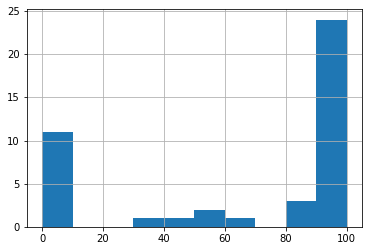

In [143]:
posfOT["max - min"].hist()

<AxesSubplot:>

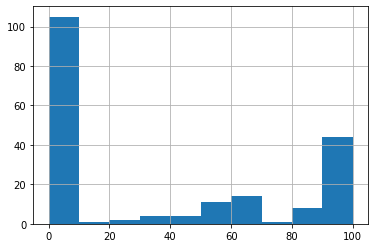

In [144]:
negfOT["max - min"].hist()

<AxesSubplot:>

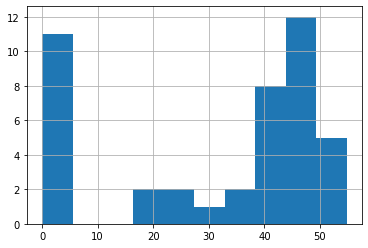

In [146]:
posfOT["stdev"].hist()

<AxesSubplot:>

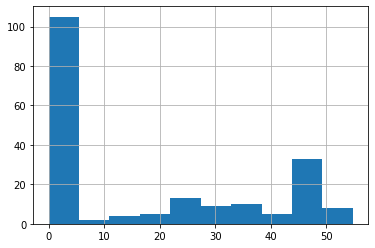

In [147]:
negfOT["stdev"].hist()

<AxesSubplot:>

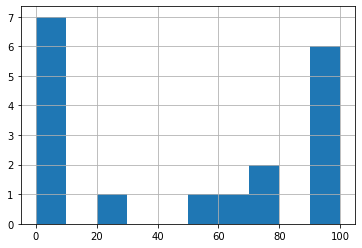

In [148]:
posfGT["max - min"].hist()

<AxesSubplot:>

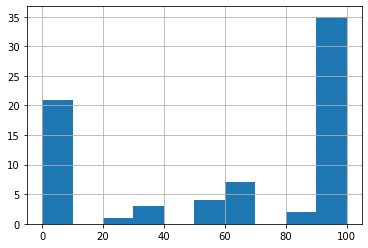

In [149]:
negfGT["max - min"].hist()

<AxesSubplot:>

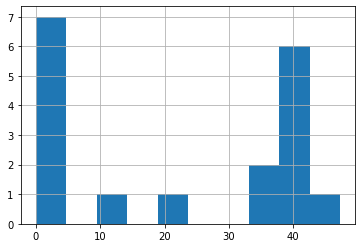

In [150]:
posfGT["stdev"].hist()

<AxesSubplot:>

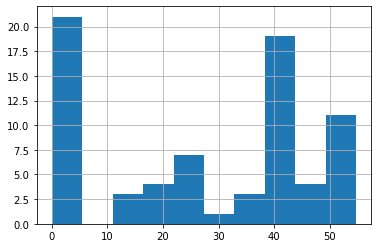

In [151]:
negfGT["stdev"].hist()

In [153]:
cutoff = 30.00

truePos = len(posfOT[posfOT["stdev"] >= cutoff])
falseNeg = len(posfOT[posfOT["stdev"] < cutoff])
print(truePos, falseNeg)

falsePos = len(negfOT[negfOT["stdev"] >= cutoff])
trueNeg = len(negfOT[negfOT["stdev"] < cutoff])
print(trueNeg, falsePos)

recall = truePos / (truePos + falseNeg)
print("Recall: ", recall) # how many times is it correct when the q is actually timely

precision = truePos / (truePos + falsePos)
print("Precision:", precision) # how many times is it correct when it detects timeliness

f1s = (2 * (precision * recall))/ (precision + recall)
print("F1 Score:", f1s)

28 15
137 57
Recall:  0.6511627906976745
Precision: 0.32941176470588235
F1 Score: 0.43750000000000006


In [152]:
cutoff = 80.00

truePos = len(posfOT[posfOT["max - min"] >= cutoff])
falseNeg = len(posfOT[posfOT["max - min"] < cutoff])
print(truePos, falseNeg)

falsePos = len(negfOT[negfOT["max - min"] >= cutoff])
trueNeg = len(negfOT[negfOT["max - min"] < cutoff])
print(trueNeg, falsePos)

recall = truePos / (truePos + falseNeg)
print("Recall: ", recall) # how many times is it correct when the q is actually timely

precision = truePos / (truePos + falsePos)
print("Precision:", precision) # how many times is it correct when it detects timeliness

f1s = (2 * (precision * recall))/ (precision + recall)
print("F1 Score:", f1s)

27 16
142 52
Recall:  0.627906976744186
Precision: 0.34177215189873417
F1 Score: 0.4426229508196721


In [93]:
dfGT

,Unnamed: 0,Question,GT Answer,GT Topic,2008 Bleu Score,2008 Predicted,2008 Topic,2014 Bleu Score,2014 Predicted,2014 Topic,...,2018 Predicted,2018 Topic,2020 Bleu Score,2020 Predicted,2020 Topic,2021 Bleu Score,2021 Predicted,2021 Topic,max - min,timely
0,0,what are the main crops grown in the united states,['Corn'],Agriculture in the United States,0.000000,"Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds",Agriculture in the United States,0.000000,"Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds",Agriculture in the United States,...,"fruits, vegetables, grains, and fiber crops",Agriculture in the United States,0.000000,"Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds",Agriculture in the United States,0.000000,"Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds",Agriculture in the United States,0.000000,True
6,6,who did the 49ers beat in the super bowls,['Cincinnati Bengals'],San Francisco 49ers,0.000000,Dallas Cowboys,San Francisco 49ers,0.000000,Dallas Cowboys,San Francisco 49ers,...,Dallas Cowboys,San Francisco 49ers,0.000000,Dallas Cowboys,San Francisco 49ers,0.000000,Washington Redskins,San Francisco 49ers,0.000000,True
7,7,when was the south asian association for regional co-operation (saarc) formed,"['8 December 1985', 'December 1985']",South Asian Association for Regional Cooperation,66.666667,"December 8, 1985",South Asian Association for Regional Cooperation,36.787944,1985,South Asian Association for Regional Cooperation,...,8 December 1985,South Asian Association for Regional Cooperation,100.000000,8 December 1985,South Asian Association for Regional Cooperation,100.000000,8 December 1985,South Asian Association for Regional Cooperation,63.212056,False
9,9,is jaffa cakes a biscuit or a cake,"['cakes', 'the Jaffa cake should be considered a cake for tax purposes', 'biscuit - sized cakes', 'Cake']",Jaffa Cakes,100.000000,cakes,Jaffa Cakes,100.000000,cake,Jaffa Cakes,...,cake,Jaffa Cakes,100.000000,cake,Jaffa Cakes,100.000000,cake,Jaffa Cakes,0.000000,False
10,10,how long was dark side of the moon number 1,"['42 : 49', 'a week']",The Dark Side of the Moon,50.000000,one week,The Dark Side of the Moon,100.000000,a week,The Dark Side of the Moon,...,a week,The Dark Side of the Moon,100.000000,a week,The Dark Side of the Moon,100.000000,a week,The Dark Side of the Moon,50.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,1196,who is known as the super fast boy in the series the icredible,"['Dashiell Robert Parr / Dash', ""Dashiell Robert Parr / Dash , the Parrs ' second child""]",The Incredibles,1.831564,Dash,The Incredibles,0.000000,Mr. Incredible,The Incredibles,...,Mr. Incredible,The Incredibles,0.000000,Mr. Incredible,The Incredibles,1.831564,Dash,The Incredibles,1.831564,False
1197,1197,who won the battle of the first battle of bull run,"['Confederate forces', 'Confederate victory', 'Confederate']",First Battle of Bull Run,0.000000,Jackson's 13,First Battle of Bull Run,100.000000,Confederate,First Battle of Bull Run,...,Confederate,First Battle of Bull Run,100.000000,Confederate,First Battle of Bull Run,100.000000,Confederate,First Battle of Bull Run,100.000000,False
1199,1199,name the cell which is attached to the lateral side of sieve tube,['sieve tube elements'],Sieve tube element,0.000000,one companion cell,Sieve tube element,6.896552,"sieve plates, pores in the plant cell walls that facilitate transport of materials between them. Each sieve tube element is normally associated with one or more nucleate companion cells",Sieve tube element,...,companion cells,Sieve tube element,0.000000,parenchyma cells,Sieve tube element,0.000000,parenchyma cells,Sieve tube element,6.896552,False
1200,1200,which government had more power under the articles of confederation,"['the states', 'states']",Articles of Confederation,33.333333,the central government,Articles of Confederation,100.000000,the states,Articles of 

In [10]:
nqot = pd.read_csv("OpenOvertime.csv")
nqot = nqot.dropna()
nqot = nqot.mask(nqot.eq('None')).dropna()
nqot.sort_values("max - min").tail(100).sample(10)
nqot['timely'] = nqot['Question'].apply(lambda x: dependent[x])  
nqst = nqot.filter(regex="Question|GT|2018|202")

In [11]:
nqst

,Question,GT Answer,GT Topic,2018 Bleu Score,2018 Predicted,2018 Topic,2020 Bleu Score,2020 Predicted,2020 Topic,2021 Bleu Score,2021 Predicted,2021 Topic
0,what are the main crops grown in the united states,['Corn'],Agriculture in the United States,100.0,"Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds",Agriculture in the United States,100.0,"Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds",Agriculture in the United States,100.0,"Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds",Agriculture in the United States
6,who did the 49ers beat in the super bowls,['Cincinnati Bengals'],San Francisco 49ers,100.0,Dallas Cowboys,San Francisco 49ers,100.0,Dallas Cowboys,San Francisco 49ers,100.0,Washington Redskins,San Francisco 49ers
7,when was the south asian association for regional co-operation (saarc) formed,"['8 December 1985', 'December 1985']",South Asian Association for Regional Cooperation,100.0,1985,South Asian Association for Regional Cooperation,100.0,1985,South Asian Association for Regional Cooperation,100.0,1985,South Asian Association for Regional Cooperation
9,is jaffa cakes a biscuit or a cake,"['cakes', 'the Jaffa cake should be considered a cake for tax purposes', 'biscuit - sized cakes', 'Cake']",Jaffa Cakes,100.0,cake,Jaffa Cakes,100.0,cake,Jaffa Cakes,100.0,cake,Jaffa Cakes
10,how long was dark side of the moon number 1,"['42 : 49', 'a week']",The Dark Side of the Moon,100.0,a week,The Dark Side of the Moon,100.0,a week,The Dark Side of the Moon,100.0,a week,The Dark Side of the Moon
...,...,...,...,...,...,...,...,...,...,...,...,...
1196,who is known as the super fast boy in the series the icredible,"['Dashiell Robert Parr / Dash', ""Dashiell Robert Parr / Dash , the Parrs ' second child""]",The Incredibles,100.0,Mr. Incredible,The Incredibles,100.0,Mr. Incredible,The Incredibles,100.0,Mr. Incredible,The Incredibles
1197,who won the battle of the first battle of bull run,"['Confederate forces', 'Confederate victory', 'Confederate']",First Battle of Bull Run,100.0,Brig. Gen. Irvin McDowell,First Battle of Bull Run,100.0,McDowell,First Battle of Bull Run,100.0,McDowell,First Battle of Bull Run
1199,name the cell which is attached to the lateral side of sieve tube,['sieve tube elements'],Sieve tube element,100.0,companion cells,Sieve tube element,50.0,parenchyma cells,Sieve tube element,100.0,parenchyma cells,Sieve tube element
1200,which government had more power under the articles of confederation,"['the states', 'states']",Articles of Confederation,100.0,the central government,Articles of Confederation,100.0,central government,Articles of Confederation,100.0,Congress,Articles of Confederation


In [12]:
nqst.groupby("2021 Bleu Score").size().sort_values().tail(25)

2021 Bleu Score
47.768754       1
75.000000       1
62.500000       1
58.333333       1
57.142857       1
51.341712       1
90.909091       1
81.435368       1
42.857143       1
36.363636       1
31.250000       1
30.326533       1
22.222222       1
9.090909        1
39.770636       1
25.000000       2
66.666667       2
87.500000       3
33.333333       7
50.000000      13
0.000000       23
100.000000    438
dtype: int64

In [13]:
nqst.loc[nqst["2018 Bleu Score"] == 100.0].filter(regex="Question|GT|2018")

,Question,GT Answer,GT Topic,2018 Bleu Score,2018 Predicted,2018 Topic
0,what are the main crops grown in the united states,['Corn'],Agriculture in the United States,100.0,"Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds",Agriculture in the United States
6,who did the 49ers beat in the super bowls,['Cincinnati Bengals'],San Francisco 49ers,100.0,Dallas Cowboys,San Francisco 49ers
7,when was the south asian association for regional co-operation (saarc) formed,"['8 December 1985', 'December 1985']",South Asian Association for Regional Cooperation,100.0,1985,South Asian Association for Regional Cooperation
9,is jaffa cakes a biscuit or a cake,"['cakes', 'the Jaffa cake should be considered a cake for tax purposes', 'biscuit - sized cakes', 'Cake']",Jaffa Cakes,100.0,cake,Jaffa Cakes
10,how long was dark side of the moon number 1,"['42 : 49', 'a week']",The Dark Side of the Moon,100.0,a week,The Dark Side of the Moon
...,...,...,...,...,...,...
1195,what is the setting of the book hoot,"['Florida and into the town of Coconut Cove', 'Florida']",Hoot (novel),100.0,Florida,Hoot (novel)
1196,who is known as the super fast boy in the series the icredible,"['Dashiell Robert Parr / Dash', ""Dashiell Robert Parr / Dash , the Parrs ' second child""]",The Incredibles,100.0,Mr. Incredible,The Incredibles
1197,who won the battle of the first battle of bull run,"['Confederate forces', 'Confederate victory', 'Confederate']",First Battle of Bull Run,100.0,Brig. Gen. Irvin McDowell,First Battle of Bull Run
1199,name the cell which is attached to the lateral side of sieve tube,['sieve tube elements'],Sieve tube element,100.0,companion cells,Sieve tube element


In [14]:
nqot.loc[2643]

KeyError: 2643

In [15]:
nqot = pd.read_csv("OpenGT.csv")
nqot = nqot.dropna()
nqot = nqot.mask(nqot.eq('None')).dropna()
nqot.sort_values("max - min").head(100).sample(10)
nqot["max bleu"] = nqot[["2018 Bleu Score", "2020 Bleu Score", "2021 Bleu Score"]].max(axis=1)
nqot.loc[nqot["2018 Bleu Score"] == 0.0]
nqot['timely'] = nqot['Question'].apply(lambda x: dependent[x])  
nqot.filter(regex="Question|GT|Bleu Score|max").sort_values("max bleu").tail(25)

,Question,GT Answer,GT Topic,2008 Bleu Score,2014 Bleu Score,2016 Bleu Score,2018 Bleu Score,2020 Bleu Score,2021 Bleu Score,max - min,max bleu
158,who was the author of the art of war,"[""the ancient Chinese military strategist Sun Tzu ( `` Master Sun '' , also spelled Sunzi )"", 'attributed to the ancient Chinese military strategist Sun Tzu', 'Sun Tzu']",The Art of War,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.000000,100.0
673,what new deal program limited production in industry,"['NIRA', 'National Industrial Recovery Act']",New Deal,50.000000,100.000000,50.000000,50.000000,100.000000,50.000000,50.000000,100.0
168,when was the miraculous journey of edward tulane published,"['March 30 , 2006', '2006']",The Miraculous Journey of Edward Tulane,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.000000,100.0
668,the group that officially elects the president of the united states is called,"['the U.S. Electoral College', 'U.S. Electoral College']",United States presidential election,60.653066,60.653066,100.000000,100.000000,60.653066,60.653066,39.346934,100.0
667,who was the winner of the first indianapolis 500,['Ray Harroun'],List of Indianapolis 500 winners,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
682,when did the us stop trading with japan,"['1940', '1939']",Events leading to the attack on Pearl Harbor,50.000000,100.000000,100.000000,100.000000,100.000000,100.000000,50.000000,100.0
664,who is the guy who walked across the twin towers,['Philippe Petit'],Philippe Petit,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.000000,100.0
710,what was the name of the plant on little shop of horrors,['Audrey II'],Little Shop of Horrors (film),100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.000000,100.0
387,when did they stop making the nissan xterra,"['2015', 'after the 2015 model year']",Nissan Xterra,0.000000,0.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.0
756,who is the present rajya sabha speaker of india,['Venkaiah Naidu'],Rajya Sabha,0.000000,0.000000,0.000000,100.000000,100.000000,100.000000,100.000000,100.0


In [16]:
nqot.groupby("2018 Bleu Score").size().sort_values()

2018 Bleu Score
23.076923       1
67.032005       1
58.410059       1
52.438111       1
40.000000       1
37.500000       1
34.227808       1
23.337955       1
92.596108       1
88.888889       1
22.222222       1
15.922918       1
14.893617       1
14.285714       1
92.004441       1
4.166667        1
11.156508       1
10.000000       1
0.819672        1
7.692308        1
6.000000        1
2.127660        1
4.347826        1
2.247191        1
4.000000        1
4.109589        1
75.000000       2
71.653131       2
51.341712       2
12.500000       2
28.571429       2
5.555556        2
18.393972       2
16.666667       2
22.313016       2
25.000000       3
23.884377       3
60.653066       3
20.000000       3
13.533528       3
47.768754       6
66.666667       7
33.333333       9
36.787944      12
50.000000      18
0.000000      173
100.000000    219
dtype: int64

In [17]:
accurate = nqot.loc[nqot["2018 Bleu Score"] == 100.0].filter(regex="Question|GT|2018")
len(accurate.loc[accurate["GT Topic"] == accurate["2018 Topic"]]) / len(accurate)

1.0

In [18]:
inaccurate = nqot.loc[nqot["2018 Bleu Score"] == 0.0].filter(regex="Question|GT|2018")
len(inaccurate.loc[inaccurate["GT Topic"] == inaccurate["2018 Topic"]]) / len(inaccurate)

1.0

In [19]:
len(inaccurate.loc[inaccurate["GT Topic"] == inaccurate["2018 Topic"]]) / len(nqot)

0.34393638170974156

In [20]:
inaccurate.loc[inaccurate["GT Topic"] == inaccurate["2018 Topic"]].sample(25)

,Question,GT Answer,GT Topic,2018 Bleu Score,2018 Predicted,2018 Topic
921,who is the leading african producer of wool,"['Sudan', 'South Africa']",Wool,0.0,Australia,Wool
794,who are the australia's got talent judges,['Kelly Osbourne'],Australia's Got Talent,0.0,"Minogue, Burlinson and Symons",Australia's Got Talent
54,this inventor co-created the film fred ott’s sneeze,"['Fred Ott', 'Edison']",Fred Ott's Sneeze,0.0,William K.L. Dickson,Fred Ott's Sneeze
509,who had the longest tenure as moderator on meet the press,['Tim Russert'],Meet the Press,0.0,Chuck Todd,Meet the Press
134,who are the judges on the fisa court,['Dennis Saylor'],United States Foreign Intelligence Surveillance Court,0.0,four of the five,United States Foreign Intelligence Surveillance Court
951,who plays timon in lion king on broadway,['Max Casella'],The Lion King (musical),0.0,Simon Gregor,The Lion King (musical)
179,when does boomer find out she a cylon,"[""In the episode `` Kobol 's Last Gleaming ''"", ""Kobol 's Last Gleaming"", ""`` Kobol 's Last Gleaming ''""]",Number Eight (Battlestar Galactica),0.0,She has accepted herself as a Cylon and is fully integrated back into their society,Number Eight (Battlestar Galactica)
75,who does bryce dallas howard play in the grinch,['Surprised Who'],Bryce Dallas Howard,0.0,Rosalind,Bryce Dallas Howard
705,who played susanna in legends of the fall,['Julia Ormond'],Legends of the Fall,0.0,Aidan Quinn,Legends of the Fall
451,how long has tom brady been playing professional football,['18 - season career'],Tom Brady,0.0,15th,Tom Brady


<AxesSubplot:>

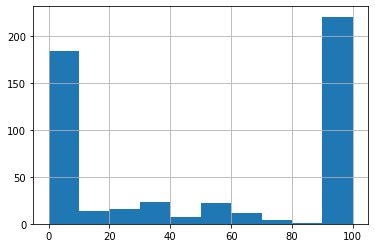

In [21]:
nqot.loc[nqot["GT Topic"] == nqot["2018 Topic"]]["2018 Bleu Score"].hist()

<AxesSubplot:>

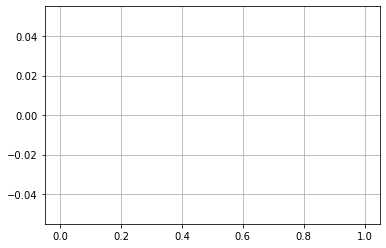

In [22]:
nqot.loc[nqot["GT Topic"] != nqot["2018 Topic"]]["2018 Bleu Score"].hist()

In [26]:
ost = pd.read_csv("OpenGT.csv")
ost = ost.dropna()
ost = ost.mask(ost.eq('None')).dropna()
ost.sort_values("max - min").head(100).sample(10)
#nqot["max bleu"] = nqot[["2018 Bleu Score", "2020 Bleu Score", "2021 Bleu Score"]].max(axis=1)
#nqot.loc[nqot["2018 Bleu Score"] == 0.0]
# nqot.filter(regex="Question|GT|Bleu Score|max").sort_values("max bleu").tail(25)

,Unnamed: 0,Question,GT Answer,GT Topic,2008 Bleu Score,2008 Predicted,2008 Topic,2014 Bleu Score,2014 Predicted,2014 Topic,...,2018 Bleu Score,2018 Predicted,2018 Topic,2020 Bleu Score,2020 Predicted,2020 Topic,2021 Bleu Score,2021 Predicted,2021 Topic,max - min
461,461,what are some special products made in mississippi,['farm - raised catfish'],Mississippi,0.0,"gospel music, country music, jazz, blues, and rock and roll",Mississippi,0.0,grocers,Mississippi,...,0.0,grocers,Mississippi,0.0,music and literature,Mississippi,0.0,music and literature,Mississippi,0.0
463,463,who sings gimme shelter with mick jagger,['Merry Clayton'],Merry Clayton,100.0,Merry Clayton,Merry Clayton,100.0,Merry Clayton,Merry Clayton,...,100.0,Merry Clayton,Merry Clayton,100.0,Merry Clayton,Merry Clayton,100.0,Merry Clayton,Merry Clayton,0.0
854,854,how many gold medals did australia win in the 2000 olympics,['16'],Australia at the 2000 Summer Olympics,0.0,5,Australia at the 2000 Summer Olympics,0.0,5,Australia at the 2000 Summer Olympics,...,0.0,"5 Gold, 9 Silver, and 4 Bronze medals",Australia at the 2000 Summer Olympics,0.0,2,Australia at the 2000 Summer Olympics,0.0,5,Australia at the 2000 Summer Olympics,0.0
431,431,the boiling point of water is 100 degrees celsius express this in si units,['100 ° C'],Celsius,0.0,hotter,Celsius,0.0,freezing point of water,Celsius,...,0.0,freezing point of water,Celsius,0.0,hotter,Celsius,0.0,freezing point of water,Celsius,0.0
360,360,who came out first batman or spider man,"['Superman', 'Batman']",First appearance,100.0,Superman,First appearance,100.0,Superman,First appearance,...,100.0,Batman,First appearance,100.0,Superman,First appearance,100.0,Superman,First appearance,0.0
388,388,who sang original i want a hippopotamus for christmas,['Gayla Peevey'],I Want a Hippopotamus for Christmas,100.0,Gayla Peevey,I Want a Hippopotamus for Christmas,100.0,Gayla Peevey,I Want a Hippopotamus for Christmas,...,100.0,Gayla Peevey,I Want a Hippopotamus for Christmas,100.0,Gayla Peevey,I Want a Hippopotamus for Christmas,100.0,Gayla Peevey,I Want a Hippopotamus for Christmas,0.0
591,591,what is the main religion in british columbia,"['Protestant', 'Catholic']",Demographics of British Columbia,0.0,"4,254,500\nPercentage of National Population: 13.2%\nPopulation Growth Rate: 4.9%\nSee Also: Demographics of Canada\nVital Statistics.",Demographics of British Columbia,0.0,British Columbia has a very diverse,Demographics of British Columbia,...,0.0,British Columbia has a very diverse,Demographics of British Columbia,0.0,Hinduism,Demographics of British Columbia,0.0,Sikhism,Demographics of British Columbia,0.0
277,277,who is the secretary of state for northern ireland,['Karen Bradley'],Secretary of State for Northern Ireland,0.0,the United Kingdom cabinet minister,Secretary of State for Northern Ireland,0.0,Her Majesty's Principal Secretary of State,Secretary of State for Northern Ireland,...,0.0,Her Majesty's Principal Secretary of State,Secretary of State for Northern Ireland,0.0,the principal secretary of state in Her Majesty's Government who represents Northern Ireland in Cabinet,Secretary of State for Northern Ireland,0.0,a secretary of state in the Government of the United Kingdom,Secretary of State for Northern Ireland,0.0
311,311,who won the gold for the men's figure skating,['Yuzuru Hanyu'],List of Olympic medalists in figure skating,0.0,2006.,List of Olympic medalists in figure skating,0.0,Russian figure skaters,List of Olympic medalists in figure skating,...,0.0,Nikolai Panin,List of Olympic medalists in figure skating,0.0,Evgeni Plushenko,List of Olympic medalists in figure skating,0.0,Gillis Grafström,List of Olympic medalists in figure skating,0.0
831,831,when is the last time wisconsin missed the ncaa tournament,['1997 -- 98'],Wisconsin Badgers men's basketball,0.0,January 31,Wisconsin Badgers men's basketball,0.0,1947,Wisconsin Badgers men's basketball,...,0.0,1959–1994,Wisconsin Badgers men's basketball,0.0,1998,Wi

In [27]:
ost.groupby("2018 Bleu Score").size().sort_values()

2018 Bleu Score
23.076923       1
67.032005       1
58.410059       1
52.438111       1
40.000000       1
37.500000       1
34.227808       1
23.337955       1
92.596108       1
88.888889       1
22.222222       1
15.922918       1
14.893617       1
14.285714       1
92.004441       1
4.166667        1
11.156508       1
10.000000       1
0.819672        1
7.692308        1
6.000000        1
2.127660        1
4.347826        1
2.247191        1
4.000000        1
4.109589        1
75.000000       2
71.653131       2
51.341712       2
12.500000       2
28.571429       2
5.555556        2
18.393972       2
16.666667       2
22.313016       2
25.000000       3
23.884377       3
60.653066       3
20.000000       3
13.533528       3
47.768754       6
66.666667       7
33.333333       9
36.787944      12
50.000000      18
0.000000      173
100.000000    219
dtype: int64

<AxesSubplot:>

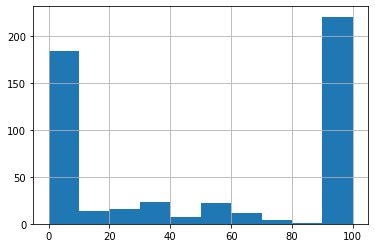

In [28]:
ost.loc[ost["GT Topic"] == ost["2018 Topic"]]["2018 Bleu Score"].hist()

In [29]:
len(ost.loc[ost["GT Topic"] == ost["2018 Topic"]].loc[ost["2018 Bleu Score"] >= 50.0]) / len(ost.loc[ost["GT Topic"] == ost["2018 Topic"]])

0.5149105367793241

<AxesSubplot:>

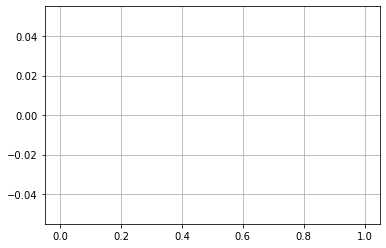

In [30]:
ost.loc[ost["GT Topic"] != ost["2018 Topic"]]["2018 Bleu Score"].hist()

In [31]:
len(ost.loc[ost["GT Topic"] != ost["2018 Topic"]].loc[ost["2018 Bleu Score"] == 100.0]) / len(ost.loc[ost["GT Topic"] != ost["2018 Topic"]])

ZeroDivisionError: division by zero

In [32]:
ost.loc[ost["GT Topic"] != ost["2018 Topic"]].loc[ost["2018 Bleu Score"] == 100.0].filter(regex="Question|GT|2018|max")

,Question,GT Answer,GT Topic,2018 Bleu Score,2018 Predicted,2018 Topic,max - min


In [33]:
ost.loc[ost["GT Topic"] == ost["2018 Topic"]].loc[ost["2018 Bleu Score"] >= 50.0].filter(regex="Question|GT|2018|max").sort_values("2018 Bleu Score")

,Question,GT Answer,GT Topic,2018 Bleu Score,2018 Predicted,2018 Topic,max - min
318,who has won the most world series in baseball,"['the New York Yankees', 'New York Yankees']",World Series,50.0,New York Yankees and the St. Louis Cardinals,World Series,100.000000
825,where does cerebrospinal fluid flow to when it exits the cerebral aqueduct,"['the fourth ventricle', 'fourth ventricle']",Ventricular system,50.0,third ventricle,Ventricular system,87.500000
165,who ruled the ottoman empire in the 1500s,"['a line of committed and effective Sultans', 'Selim I']",Ottoman Empire,50.0,Osman I,Ottoman Empire,66.666667
162,what was vietnam called in the years before world war 2,"['French Indochina , consisting of Cochinchina ( southern Vietnam ) , Annam ( central Vietnam ) , Tonkin ( northern Vietnam )', 'French Indochina']",History of Vietnam,50.0,Democratic Republic of Vietnam,History of Vietnam,13.212056
540,who won the mvp for the national league,"['Giancarlo Stanton', 'Stanton , Giancarlo']",Major League Baseball Most Valuable Player Award,50.0,carlo Stanton,Major League Baseball Most Valuable Player Award,50.000000
...,...,...,...,...,...,...,...
489,who wrote the book the origin of species,['Charles Darwin'],On the Origin of Species,100.0,Charles Darwin,On the Origin of Species,0.000000
495,who starred in the movie summer of 42,"[""Jennifer O'Neill"", 'Gary Grimes']",Summer of '42,100.0,Gary Grimes,Summer of '42,60.000000
498,who has the most podium finishes in australia,['Michael Schumacher'],List of Formula One driver records,100.0,Michael Schumacher,List of Formula One driver records,100.000000
445,who has the most olympic medals in figure skating,"['Tessa Virtue', 'Canadian ice dancers Tessa Virtue and Scott Moir']",List of Olympic medalists in figure skating,100.0,Tessa Virtue and Scott Moir,List of Olympic medalists in figure skating,100.000000


In [34]:
est = pd.read_csv("ElasticGT.csv")
est = est.dropna()
est = est.mask(est.eq('None')).dropna()
est.sort_values("max - min")

,Unnamed: 0,Question,GT Answer,GT Topic,2008 Bleu Score,2008 Predicted,2008 Topic,2014 Bleu Score,2014 Predicted,2014 Topic,...,2018 Bleu Score,2018 Predicted,2018 Topic,2020 Bleu Score,2020 Predicted,2020 Topic,2021 Bleu Score,2021 Predicted,2021 Topic,max - min
2179,2179,what type of business is chamber of commerce,"['a form of business network', 'a form of business network , for example , a local organization of businesses whose goal is to further the interests of businesses']",Chamber of commerce,100.000000,a form of business network,Chamber of commerce,100.0,a form of business network,Chamber of commerce,...,100.0,a form of business network,Chamber of commerce,100.0,a form of business network,Chamber of commerce,100.0,a form of business network,Chamber of commerce,0.0
1774,1774,which country is the last member of saarc,['Afghanistan'],South Asian Association for Regional Cooperation,0.000000,Sri Lankan,South Asian Association for Regional Cooperation,0.0,Nepal,South Asian Association for Regional Cooperation,...,0.0,Bangladesh,South Asian Association for Regional Cooperation,0.0,Bangladesh,South Asian Association for Regional Cooperation,0.0,Bangladesh,South Asian Association for Regional Cooperation,0.0
3449,3449,who were farmers who kept a small portion of their crops & gave the rest to the landowners,['Sharecropping'],Sharecropping,0.000000,"Sharecrop farmers were loaned a plot of land to work, and in exchange owed the owner a share of the crop at the end of the season. Often the planter’s share was 1/3, though sometime it was much higher. The sharecropper was required to purchase seed, tools and fertilizer, as well as food and clothing, on credit at the plantation store. When the harvest came, the sharecrop farmer",Sharecropping,0.0,Sharecroppers,Sharecropping,...,0.0,tenant farmers,Sharecropping,0.0,tenant farmers,Sharecropping,0.0,tenant farmers,Sharecropping,0.0
1768,1768,natural resources can be divided into what two categories,['Biotic'],Natural resource,0.000000,renewable and non-renewable resources,Natural resource,0.0,renewable or non-renewable,Natural resource,...,0.0,needs of future generations,Natural resource,0.0,"land, water, fisheries and pastoral rights",Natural resource,0.0,different ways,Natural resource,0.0
3444,3444,how many lines of symmetry are there in a equilateral triangle,"['3', '3 lines of reflection and rotational symmetry']",Equilateral triangle,100.000000,3,Equilateral triangle,100.0,3,Equilateral triangle,...,100.0,3,Equilateral triangle,100.0,3,Equilateral triangle,100.0,3,Equilateral triangle,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197,3197,a country having an island location and a country having continental location,['Australia'],List of island countries,0.000000,Micronesia,List of island countries,100.0,Australia,List of island countries,...,2.5,"Australia is designated as a continent, it is often referred to as an island, as it has no land borders. Some declared island countries are not universally recognized as politically independent, such as Northern Cyprus. Some states, such as Taiwan",List of island countries,100.0,Australia,List of island countries,100.0,Australia,List of island countries,100.0
3204,3204,what grade was arnold from hey arnold in,['fourth'],Hey Arnold!,0.000000,4th,Hey Arnold!,100.0,fourth,Hey Arnold!,...,100.0,fourth,Hey Arnold!,100.0,fourth,Hey Arnold!,100.0,fourth,Hey Arnold!,100.0
1245,1245,who plays jack skellington in nightmare before christmas,['Chris Sarandon'],Jack Skellington,0.000000,Sally,Jack Skellington,100.0,Chris Sarandon,Jack Skellington,...,100.0,Chris Sarandon,Jack Skellington,100.0,Chris Sarandon,Jack Skellington,100.0,Chris Sarandon,Jack Skellington,100.0
3180,3180,why was the plague that struck athens so devastating,['close quarters and poor hygiene'],Plague of Athens,42.857143,poor hygiene habits and public sanitation conditions,Plague of Athens,0.0,no one could recall anywhere its like,P

In [35]:
len(est.loc[est["GT Topic"] == est["2018 Topic"]])

2150

In [36]:
est.groupby("2018 Bleu Score").size().sort_values()

2018 Bleu Score
15.922918       1
18.750000       1
18.887560       1
19.470020       1
19.983114       1
             ... 
36.787944      32
33.333333      37
50.000000      65
0.000000      590
100.000000    804
Length: 297, dtype: int64

<AxesSubplot:>

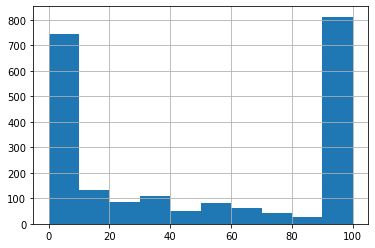

In [37]:
est.loc[est["GT Topic"] == est["2018 Topic"]]["2018 Bleu Score"].hist()

In [38]:
est.loc[est["2018 Bleu Score"] >= 50.0].filter(regex="Question|GT|2018")

,Question,GT Answer,GT Topic,2018 Bleu Score,2018 Predicted,2018 Topic
6,where was the world economic forum held this year,"['Davos , a mountain resort in Graubünden , in the eastern Alps region of Switzerland', 'Davos']",World Economic Forum,100.000000,Davos,World Economic Forum
18,where did the race in grease take place,"['the Los Angeles River , between the First and Seventh Street Bridges', 'at the Los Angeles River , between the First and Seventh Street Bridges', 'Thunder Road']",Grease (film),100.000000,Los Angeles River,Grease (film)
21,a good that can be used in place of another good,"['A substitute good', 'substitute good']",Substitute good,100.000000,substitute good,Substitute good
31,how old was sasuke when his clan died,['seven'],Sasuke Uchiha,100.000000,seven,Sasuke Uchiha
34,who is the pastor of new birth missionary baptist church now,"['Stephen A. Davis', 'Stephen A. Davis , pastor of New Birth Birmingham in Birmingham , Alabama']",New Birth Missionary Baptist Church,100.000000,Stephen A. Davis,New Birth Missionary Baptist Church
...,...,...,...,...,...,...
4230,how long is one full rotation of the earth,"['about 24 hours with respect to the Sun , but once every 23 hours , 56 minutes , and 4 seconds with respect to the stars', 'about 24 hours']",Earth's rotation,80.000000,once in about 24 hours,Earth's rotation
4247,what is the meaning of molech in the bible,"['biblical name of a Canaanite god associated with child sacrifice', 'king', 'a Canaanite god associated with child sacrifice', 'the biblical name of a Canaanite god associated with child sacrifice']",Moloch,67.032005,the name of a god,Moloch
4249,who wrote the song fly me to the moon,['Bart Howard'],Fly Me to the Moon,100.000000,Bart Howard,Fly Me to the Moon
4278,when was the first driver's license required,"['1888', '1 January 1904 after the Motor Car Act 1903 received royal assent in the United Kingdom', '1 January 1904']",Driver's license,100.000000,1 January 1904,Driver's license


In [39]:
1026/len(est)

0.4772093023255814